# Spam/Ham model

Importing NLTK

In [1]:
import nltk

Downloading the corpus for Stopwords from Shell

In [2]:
nltk.download_shell()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> stopwords
        C:\Users\Hitesh\AppData\Roaming\nltk_data...
      Package stopwords is already up-to-date!

---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


Checking the list of messages in the dataset using rstrip()

In [3]:
messages = list(line.rstrip() for line in open('smsspamcollection/SMSSpamCollection'))

In [4]:
messages[10]

"ham\tI'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."

Checking the length of messages

In [5]:
print(len(messages))

5574


Using Enumerator to see the list of messages

In [6]:
for mess_no, message in enumerate(messages[:10]):
    print(mess_no, message)
    print('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [7]:
messages[0]

'ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

Importing Pandas

In [8]:
import pandas as pd

Loading the dataset

In [9]:
messages = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t',
                      names = ['label','message'])

# Exploratory Data Analysis

In [10]:
messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
messages.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


Grouping the data with respect to Ham/Spam

In [12]:
messages.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Creating a new column length using apply() function

In [13]:
messages['length'] = messages['message'].apply(len)

In [14]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


# Performing Visualization

Importing Visualization Libraries

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Plotting the frequency of length of messages 

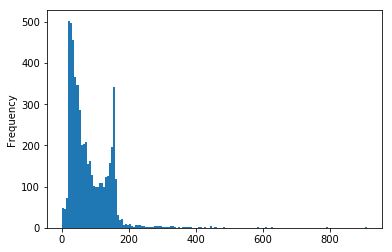

In [16]:
messages['length'].plot.hist(bins=150)

In [17]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

Calling the longest message in the dataset

In [18]:
messages[messages['length'] == 910]['message'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

Checking the length of messages with respect to their Labels

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0D553810>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x0D603EB0>], dtype=object)

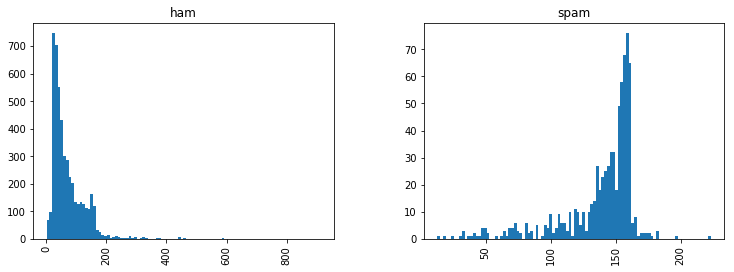

In [19]:
messages.hist(column = 'length', by = 'label',bins=100, figsize=(12,4))

It looks like Spam length has a mean around 150 and Ham length messages are centered around 50

# Perfoming Text Preprocessing

Importing String library to remove all the punctutions from the list

In [20]:
import string

As an example create a sample string and trying to remove all the punctuation marks

In [21]:
mess = 'Sample message! Notice: it has punctuation.'

In [22]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

Checking the presence of charcters in the string

In [23]:
nopunc = [c for c in mess if c not in string.punctuation]

In [24]:
nopunc

['S',
 'a',
 'm',
 'p',
 'l',
 'e',
 ' ',
 'm',
 'e',
 's',
 's',
 'a',
 'g',
 'e',
 ' ',
 'N',
 'o',
 't',
 'i',
 'c',
 'e',
 ' ',
 'i',
 't',
 ' ',
 'h',
 'a',
 's',
 ' ',
 'p',
 'u',
 'n',
 'c',
 't',
 'u',
 'a',
 't',
 'i',
 'o',
 'n']

Import the Corpus of all stopwords from nltk

In [25]:
from nltk.corpus import stopwords

In [26]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

Joining the characters to again form the string

In [27]:
nopunc = ''.join(nopunc)

In [28]:
nopunc

'Sample message Notice it has punctuation'

In [29]:
x = ['a','b','c','d']

In [30]:
''.join(x)

'abcd'

Splitting the string into list

In [31]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'punctuation']

Cleaning the string and removing stopwords

In [32]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [33]:
clean_mess

['Sample', 'message', 'Notice', 'punctuation']

Creating a function 'text_process' to remove Punctuations and Stopwords, and Returning the list of clean text 

In [34]:
def text_process(mess):
    """
    1. remove punc
    2. remove stop words
    3. return list of clean text words
    """
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [35]:
messages.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


Applying the function on the list of Messages

In [36]:
messages['message'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: message, dtype: object

# Bag of Words Algorithm and Vectorization

Importing CountVectorizer

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

Creating a Vector of Bag of Words

In [38]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['message'])

In [39]:
print(len(bow_transformer.vocabulary_))

11425


In [40]:
mess4 = messages['message'][3]

In [41]:
print(mess4)

U dun say so early hor... U c already then say...


Transforming the message into Vector of Bag of Words

In [42]:
bow4 = bow_transformer.transform([mess4])

In [43]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [44]:
print(bow4.shape)

(1, 11425)


Checking the feature name

In [45]:
bow_transformer.get_feature_names()[9554]

'say'

Transforming all the messages in our dataset

In [46]:
messages_bow = bow_transformer.transform(messages['message'])

Checking the shape of sparse matrix created after Vectorization

In [47]:
print('Shape of Sparse Matrix: ', messages_bow.shape)

Shape of Sparse Matrix:  (5572, 11425)


Checking the non zero occurence in the matrix

In [48]:
messages_bow.nnz

50548

Calculating Sparsity of Matrix

In [49]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))
print('sparsity: {}'.format(round(sparsity)))

sparsity: 0


In [50]:
sparsity = (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1]))

In [51]:
sparsity

0.07940295412668218

Importing Term frequency- Inverse Document Frequency transformer from Sklearn

In [52]:
from sklearn.feature_extraction.text import TfidfTransformer

Tranforming the entire Bag of Words corpus into Tfidf

In [53]:
tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [54]:
tfidf4 = tfidf_transformer.transform(bow4) 

In [55]:
print(tfidf4)

  (0, 9554)	0.538562626293
  (0, 7186)	0.438936565338
  (0, 6222)	0.318721689295
  (0, 6204)	0.299537997237
  (0, 5261)	0.297299574059
  (0, 4629)	0.266198019061
  (0, 4068)	0.408325899334


Checking the Tfidf of Random word from the corpus

In [56]:
tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

8.527076498901426

Transforming all messages into Tfidf 

In [57]:
messages_tfidf = tfidf_transformer.transform(messages_bow)

# Building the Classification Model using Navie Bayes

In [58]:
from sklearn.naive_bayes import MultinomialNB

Fitting the model

In [59]:
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['label'])

In [60]:
spam_detect_model.predict(tfidf4)[0]

'ham'

In [61]:
messages['label'][3]

'ham'

Making predictions 

In [62]:
all_pred = spam_detect_model.predict(messages_tfidf)

In [63]:
all_pred

array(['ham', 'ham', 'spam', ..., 'ham', 'ham', 'ham'],
      dtype='<U4')

Importing train_test_split

In [64]:
from sklearn.model_selection import train_test_split

Splitting the data into Training and Testing set

In [65]:
msg_train, msg_test, label_train, label_test = train_test_split(messages['message'],messages['label'],test_size=0.3)

In [66]:
msg_train

1330    I dont know what to do to come out of this so ...
2356    Hello, my love ! How went your day ? Are you a...
3372    Tomorrow i am not going to theatre. . . So i c...
2529                     jay says he'll put in  &lt;#&gt;
5193                It's wylie, you in tampa or sarasota?
4629    Todays Voda numbers ending with 7634 are selec...
4491    My computer just fried the only essential part...
4791    Yup. Izzit still raining heavily cos i'm in e ...
730                                     Dunno y u ask me.
1399     No did you check? I got his detailed message now
775                            Just sleeping..and surfing
777     Why don't you go tell your friend you're not s...
277                Tell rob to mack his gf in the theater
1297    Sure! I am driving but will reach my destinati...
2470                                       * Am on my way
2561                     Are you still getting the goods.
5231    I realise you are a busy guy and i'm trying no...
995           

Creating a pipeline to perform Vectorization, Tfidf Tranformation and Classification

Importing Pipeline from Sklearn

In [67]:
from sklearn.pipeline import Pipeline

Building Pipeline

In [68]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',MultinomialNB())
    ])

Fitting the data into the pipeline

In [69]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0DBBEA08>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

Making Predictions

In [70]:
predictions = pipeline.predict(msg_test)

Importing Classification Reports and Confusion Matrix from Sklearn.metrics

In [71]:
from sklearn.metrics import classification_report, confusion_matrix

Printing the results of Classification Reports and confusion matrix

In [72]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.97      1437
       spam       1.00      0.67      0.80       235

avg / total       0.96      0.95      0.95      1672



[[1437    0]
 [  78  157]]


It seems like Classifier has done a good job!!

Now checking the performance of other well known classifier on this dataset

# Random Forest Classification

In [73]:
from sklearn.ensemble import RandomForestClassifier

In [74]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',RandomForestClassifier())
    ])

In [75]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0DBBEA08>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False))])

In [76]:
predictions = pipeline.predict(msg_test)

In [77]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.95      1.00      0.98      1437
       spam       0.99      0.70      0.82       235

avg / total       0.96      0.96      0.95      1672



[[1435    2]
 [  71  164]]


Now Fitting Logistic Regression

# Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression

In [92]:
pipeline = Pipeline([('bow',CountVectorizer(analyzer=text_process)),
                     ('tfidf',TfidfTransformer()),
                     ('classifier',LogisticRegression())
    ])

In [93]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x0DBBEA08>, binary=False,
        decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [94]:
predictions = pipeline.predict(msg_test)

In [95]:
print(classification_report(label_test, predictions))
print('\n')
print(confusion_matrix(label_test,predictions))

             precision    recall  f1-score   support

        ham       0.94      1.00      0.97      1437
       spam       0.99      0.60      0.75       235

avg / total       0.95      0.94      0.94      1672



[[1436    1]
 [  93  142]]
